# Data information 

Name of Dataset: houseprice.csv

Fetch from: Kaggle

URL: https://www.kaggle.com/ruiqurm/lianjia/download

License: CC BY-NC-SA 4.0, no certain restriction on its use

Size: 56MB and has about 318852 rows × 26 columns


In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read data
house_price = pd.read_csv('C:/Users/93171/Desktop/houseprice.csv', ',',encoding = 'unicode_escape', low_memory=False)
house_price

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,...,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318846,https://bj.lianjia.com/chengjiao/BJYZ92311192....,BJYZ92311192,116.546899,39.755236,1111027377053,2016-06-10,1.0,8,350.0,20580,...,4.0,2003,1,6,0.333,0.0,1.0,0.0,3,36545.0
318847,https://bj.lianjia.com/chengjiao/BJYZ92320171....,BJYZ92320171,116.497474,39.810115,1111027377957,2016-06-10,NaN,1,108.8,31006,...,1.0,2009,1,6,0.222,1.0,0.0,1.0,3,54282.0
318848,https://bj.lianjia.com/chengjiao/BJYZ92324217....,BJYZ92324217,116.497256,39.804081,1111027380056,2016-06-05,1.0,2,359.0,35138,...,4.0,2000,3,6,0.500,1.0,1.0,0.0,3,46927.0
318849,https://bj.lianjia.com/chengjiao/BJYZ92333313....,BJYZ92333313,116.501794,39.799347,1111027377054,2016-06-12,NaN,4,720.0,40373,...,4.0,2003,4,2,0.500,0.0,1.0,0.0,3,54842.0


In [3]:
# remove unnecessary columns 
house_price_fixed = house_price.drop(columns=['id','url', 'DOM','Cid', 'followers',
                                              'fiveYearsProperty', 'buildingStructure',  'communityAverage'])
house_price_fixed

,Lng,Lat,tradeTime,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,ladderRatio,elevator,subway,district
0,116.475489,40.019520,2016-08-09,415.0,31680,131.00,2,1,1,1,¸ß 26,1.0,2005,3,0.217,1.0,1.0,7
1,116.453917,39.881534,2016-07-28,575.0,43436,132.38,2,2,1,2,¸ß 22,1.0,2004,4,0.667,1.0,0.0,7
2,116.561978,39.877145,2016-12-11,1030.0,52021,198.00,3,2,1,3,ÖÐ 4,4.0,2005,3,0.500,1.0,0.0,7
3,116.438010,40.076114,2016-09-30,297.5,22202,134.00,3,1,1,1,µ× 21,1.0,2008,1,0.273,1.0,0.0,6
4,116.428392,39.886229,2016-08-28,392.0,48396,81.00,2,1,1,1,ÖÐ 6,4.0,1960,2,0.333,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318846,116.546899,39.755236,2016-06-10,350.0,20580,170.07,3,2,1,2,ÖÐ 5,4.0,2003,1,0.333,0.0,0.0,3
318847,116.497474,39.810115,2016-06-10,108.8,31006,35.09,1,0,1,1,ÖÐ 24,1.0,2009,1,0.222,1.0,1.0,3
318848,116.497256,39.804081,2016-06-05,359.0,35138,102.17,2,2,1,2,ÖÐ 7,4.0,2000,3,0.500,1.0,0.0,3
318849,116.501794,39.799347,2016-06-12,720.0,40373,178.34,4,2,1,2,ÖÐ 5,4.0,2003,4,0.500,0.0,0.0,3


In [4]:
house_price_fixed['tradeTime'].str[0:4].unique()

array(['2016', '2017', '2018', '2010', '2011', '2012', '2013', '2014',
       '2015', '2008', '2002', '2003', '2009'], dtype=object)

In [5]:
# check entries of each year 
house_price_fixed.groupby(house_price_fixed['tradeTime'].str[0:4]).count()

,Lng,Lat,tradeTime,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,ladderRatio,elevator,subway,district
tradeTime,,,,,,,,,,,,,,,,,,
2002,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2003,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2008,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2009,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2010,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,177,177,189
2011,6010,6010,6010,6010,6010,6010,6010,6010,6010,6010,6010,5989,6010,6010,6010,6003,6003,6010
2012,37221,37221,37221,37221,37221,37221,37221,37221,37221,37221,37221,37121,37221,37221,37221,37216,37216,37221
2013,38751,38751,38751,38751,38751,38751,38751,38751,38751,38751,38751,38592,38751,38751,38751,38747,38747,38751
2014,32602,32602,32602,32602,32602,32602,32602,32602,32602,32602,32602,32479,32602,32602,32602,32600,32600,32602


## Remove unnecesary rows

For the data is mainly focusing on 2011 to 2017 several records out of the range is not considered, e.g. 2002-2011.

In [6]:
pop_l = ['2010', '2018', '2008', '2002', '2003', '2009']
for item in pop_l:
    house_remove = house_price_fixed[house_price_fixed['tradeTime'].str[0:4] == item] # remove the year with only a few records
    house_price_fixed = house_price_fixed.drop(labels=house_remove.axes[0])

In [7]:
house_price_fixed['tradeTime'].str[0:4].unique()

array(['2016', '2017', '2011', '2012', '2013', '2014', '2015'],
      dtype=object)

In [8]:
# check entries of each year 
house_price_fixed.groupby(house_price_fixed['tradeTime'].str[0:4]).count()

,Lng,Lat,tradeTime,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,ladderRatio,elevator,subway,district
tradeTime,,,,,,,,,,,,,,,,,,
2011,6010,6010,6010,6010,6010,6010,6010,6010,6010,6010,6010,5989,6010,6010,6010,6003,6003,6010
2012,37221,37221,37221,37221,37221,37221,37221,37221,37221,37221,37221,37121,37221,37221,37221,37216,37216,37221
2013,38751,38751,38751,38751,38751,38751,38751,38751,38751,38751,38751,38592,38751,38751,38751,38747,38747,38751
2014,32602,32602,32602,32602,32602,32602,32602,32602,32602,32602,32602,32479,32602,32602,32602,32600,32600,32602
2015,69805,69805,69805,69805,69805,69805,69805,69805,69805,69805,69805,69435,69805,69805,69805,69803,69803,69805
2016,90829,90829,90829,90829,90829,90829,90829,90829,90829,90829,90829,90061,90829,90829,90829,90829,90829,90829
2017,43217,43217,43217,43217,43217,43217,43217,43217,43217,43217,43217,42739,43217,43217,43217,43217,43217,43217


## Explore data types 

In [9]:
house_price_fixed.dtypes

Lng                    float64
Lat                    float64
tradeTime               object
totalPrice             float64
price                    int64
square                 float64
livingRoom              object
drawingRoom             object
kitchen                  int64
bathRoom                object
floor                   object
buildingType           float64
constructionTime        object
renovationCondition      int64
ladderRatio            float64
elevator               float64
subway                 float64
district                 int64
dtype: object

In [10]:
house_price_fixed.describe()

,Lng,Lat,totalPrice,price,square,kitchen,buildingType,renovationCondition,ladderRatio,elevator,subway,district
count,318435.000000,318435.000000,318435.000000,318435.000000,318435.000000,318435.000000,316416.000000,318435.000000,3.184350e+05,318415.000000,318415.000000,318435.000000
mean,116.418637,39.949595,349.076639,43536.185303,83.240546,0.995041,3.009352,2.605527,6.324686e+01,0.577193,0.601460,6.760425
std,0.111845,0.091997,230.732078,21700.286024,37.243678,0.105752,1.269947,1.311871,2.508488e+04,0.494006,0.489598,2.810593
min,116.072514,39.627030,0.100000,1.000000,6.900000,0.000000,0.048000,0.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,116.345084,39.893200,205.000000,28063.000000,57.900000,1.000000,1.000000,1.000000,2.500000e-01,0.000000,0.000000,6.000000
50%,116.416780,39.934527,294.000000,38738.000000,74.240000,1.000000,4.000000,3.000000,3.330000e-01,1.000000,1.000000,7.000000
75%,116.477581,40.003018,426.000000,53818.000000,98.720000,1.000000,4.000000,4.000000,5.000000e-01,1.000000,1.000000,8.000000
max,116.732378,40.252758,18130.000000,156250.000000,1745.500000,4.000000,4.000000,4.000000,1.000940e+07,1.000000,1.000000,13.000000


In [11]:
house_price_fixed['livingRoom'].unique()

array(['2', '3', '1', '4', '5', '6', '9', '0', '7', '8', '#NAME?'],
      dtype=object)

In [12]:
house_price_fixed['drawingRoom'].unique()

array(['1', '2', '0', '4', '3', '5', 'ÖÐ 6', 'ÖÐ 16', '¸ß 12', 'µÍ 6',
       '¶¥ 6', '¸ß 14', 'µÍ 15', '¸ß 6', 'µ× 28', 'µ× 11', 'ÖÐ 24',
       'µ× 20', 'ÖÐ 22'], dtype=object)

In [13]:
house_price_fixed['bathRoom'].unique()

array(['1', '2', '3', '0', '4', '5', '6', '7', '1996', '2005', '2011',
       '2000', '2006', '2003', 'Î´Öª', '1994', '2004'], dtype=object)

In [14]:
house_price_fixed['floor'].unique()

array(['¸ß 26', '¸ß 22', 'ÖÐ 4', 'µ× 21', 'ÖÐ 6', 'ÖÐ 8', '¸ß 6', '¸ß 10',
       'ÖÐ 23', 'µ× 11', 'µ× 3', '¸ß 24', 'µÍ 23', 'ÖÐ 19', '¸ß 18',
       'µÍ 25', 'ÖÐ 12', 'ÖÐ 14', 'ÖÐ 30', 'ÖÐ 27', 'ÖÐ 5', 'µÍ 18',
       'µ× 28', 'ÖÐ 11', 'µÍ 9', '¶¥ 7', '¶¥ 27', 'µÍ 6', 'ÖÐ 17', '¶¥ 6',
       'ÖÐ 24', 'ÖÐ 15', 'µ× 5', 'ÖÐ 29', '¶¥ 19', '¶¥ 5', 'ÖÐ 9',
       'µÍ 22', '¶¥ 18', 'µÍ 16', '¸ß 13', '¸ß 9', '¸ß 17', 'µ× 6',
       'ÖÐ 28', 'µÍ 26', 'µ× 15', '¸ß 16', 'µ× 2', 'µÍ 7', 'ÖÐ 13',
       'µÍ 33', 'µ× 14', '¸ß 15', 'µ× 4', '¶¥ 11', 'ÖÐ 32', '¶¥ 16',
       'µ× 18', '¶¥ 17', 'µÍ 14', 'µÍ 10', 'µ× 20', '¸ß 12', 'µÍ 31',
       'µÍ 30', 'µÍ 19', 'µÍ 12', 'ÖÐ 10', 'ÖÐ 16', '¶¥ 20', 'µ× 19',
       'ÖÐ 31', 'µÍ 13', 'µ× 10', '¸ß 25', 'ÖÐ 21', 'ÖÐ 20', '¸ß 20',
       'µÍ 21', 'µÍ 24', '¶¥ 4', '¸ß 21', '¸ß 7', 'ÖÐ 22', 'µ× 1', 'ÖÐ 7',
       'µ× 8', '¶¥ 15', 'ÖÐ 18', '¸ß 28', '¶¥ 14', '¶¥ 13', 'µÍ 20',
       'µ× 26', 'µÍ 17', '¶¥ 24', 'µ× 23', '¶¥ 3', '¶¥ 21', 'µ× 24',
       '¸ß 30', '

As livingRoom, drawingRoom, bathRoom and floor are numerical values showing how many rooms are in the house. So here transfer the datatypes and remove all the unknow values '#NAME?' and also special characters.

In [15]:
# get index of '#NAME?'
strange = house_price_fixed[house_price_fixed['livingRoom'] == '#NAME?']
house_price_fixed = house_price_fixed.drop(labels=strange.index)
house_price_fixed['livingRoom'] = house_price_fixed['livingRoom'].astype('int64')
house_price_fixed['livingRoom'].unique()

array([2, 3, 1, 4, 5, 6, 9, 0, 7, 8], dtype=int64)


Remove the special characters by regular expressions and then change the object datatype to int64.

In [16]:
reg_ex = re.compile(r"[^\d]+", re.IGNORECASE)
house_price_fixed['bathRoom'] = house_price_fixed['bathRoom'].replace(reg_ex, '')
house_price_fixed['drawingRoom'] = house_price_fixed['drawingRoom'].astype('int64')
house_price_fixed['drawingRoom'].unique()

array([1, 2, 0, 4, 3, 5], dtype=int64)

In [17]:
reg_ex = re.compile(r"[^\d]+", re.IGNORECASE)
house_price_fixed['bathRoom'] = house_price_fixed['bathRoom'].replace(reg_ex, '')
house_price_fixed['bathRoom'] = house_price_fixed['bathRoom'].astype('int64')
house_price_fixed['bathRoom'].unique()

array([1, 2, 3, 0, 4, 5, 6, 7], dtype=int64)

In [18]:
reg_ex = re.compile(r"[^\d]+", re.IGNORECASE)
house_price_fixed['floor'] = house_price_fixed['floor'].replace(reg_ex, '')
house_price_fixed['floor'] = house_price_fixed['floor'].astype('int64')
house_price_fixed['floor'].unique()

array([26, 22,  4, 21,  6,  8, 10, 23, 11,  3, 24, 19, 18, 25, 12, 14, 30,
       27,  5, 28,  9,  7, 17, 15, 29, 16, 13,  2, 33, 32, 20, 31,  1, 34,
       42, 37, 36, 35, 63, 57], dtype=int64)

In [19]:
# remove "" rows 
reg_ex = re.compile(r"[^\d]+", re.IGNORECASE)
house_price_fixed['constructionTime'] = house_price_fixed['constructionTime'].replace(reg_ex, '')
index = house_price_fixed[house_price_fixed['constructionTime']=='']
house_price_fixed = house_price_fixed.drop(labels=index.index)
house_price_fixed['constructionTime'] = house_price_fixed['constructionTime'].astype('int64')
house_price_fixed['constructionTime'].unique()

array([2005, 2004, 2008, 1960, 1997, 2009, 2006, 1991, 2001, 1990, 2011,
       2000, 1998, 2010, 1996, 1993, 2002, 2012, 1989, 2003, 2007, 1994,
       1984, 1992, 2014, 1985, 2013, 1999, 1979, 1981, 1976, 1982, 1975,
       1983, 1986, 1995, 1965, 1988, 1987, 2015, 1955, 1980, 1978, 1958,
       1970, 1956, 1977, 1964, 1963, 1967, 2016, 1974, 1973, 1959, 1954,
       1962, 1966, 1957, 1944, 1972, 1971, 1953, 1968, 1961, 1950, 1952,
       1933, 1969, 1906, 1934, 1914], dtype=int64)

The datatpyes of all columns after data preprocessing.

In [20]:
house_price_fixed.dtypes

Lng                    float64
Lat                    float64
tradeTime               object
totalPrice             float64
price                    int64
square                 float64
livingRoom               int64
drawingRoom              int64
kitchen                  int64
bathRoom                 int64
floor                    int64
buildingType           float64
constructionTime         int64
renovationCondition      int64
ladderRatio            float64
elevator               float64
subway                 float64
district                 int64
dtype: object

Draw a quick view of price verses time use matplotlib. 

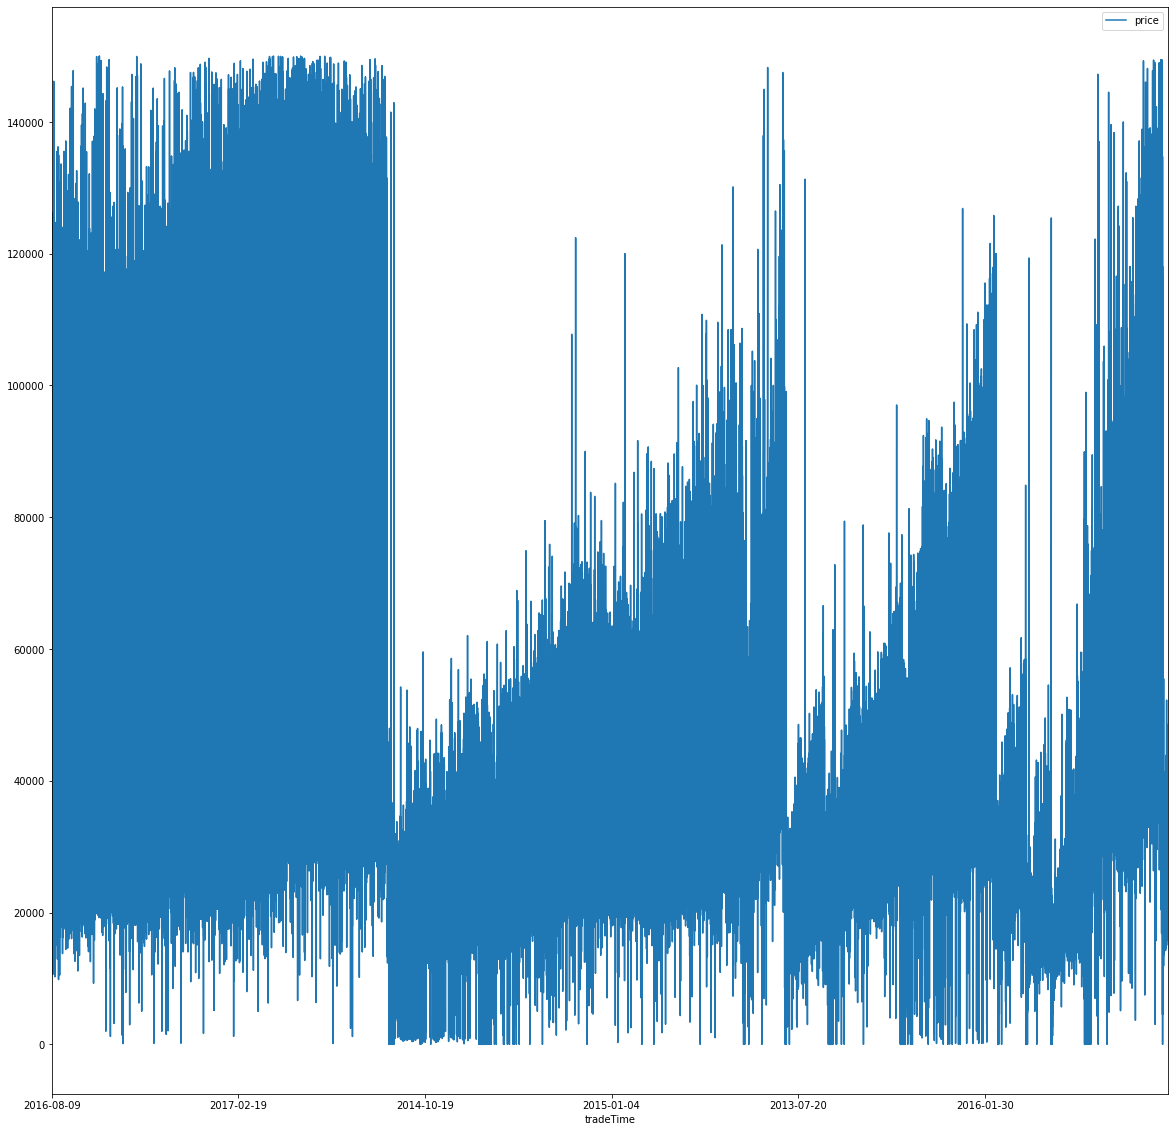

In [21]:
house_price_fixed.plot(y = 'price', x = 'tradeTime',figsize = (20,20))

# Data summary


## Data time range
All data in the dataframe includes entries from 2002 to 2018, and those are not in the range of 2011-2017 has no more than 300 entries. So those data are removed, only 2011-2017 left.

## Datatypes summary 

Lng --float64

Lat  --                  float64

tradeTime        --       object

totalPrice        --     float64

price            --        int64

square            --     float64

livingRoom          --     int64

drawingRoom          --    int64

kitchen             --     int64

bathRoom              --   int64

floor                 --   int64

buildingType       --    float64

constructionTime      --   int64

renovationCondition     -- int64

ladderRatio      --      float64

elevator         --      float64

subway            --     float64

district           --      int64



## Columns information

For houseprice.csv file:

url: the url which fetches the data

id: the id of transaction

Lng: and Lat coordinates, using the BD09 protocol.

Cid: community id

tradeTime: the time of transaction

DOM: active days on market.Know more in https://en.wikipedia.org/wiki/Days_on_market

followers: the number of people follow the transaction.

totalPrice: the total price

price: the average price by square

square: the square of house

livingRoom: the number of living room

drawingRoom: the number of drawing room

kitchen: the number of kitchen

bathroom the number of bathroom

floor: the height of the house. I will turn the Chinese characters to English in the next version.

buildingType: including tower( 1 ) , bungalow( 2 )，combination of plate and tower( 3 ), plate( 4 ).

constructionTime: the time of construction

renovationCondition: including other( 1 ), rough( 2 ),Simplicity( 3 ), hardcover( 4 )

buildingStructure: including unknow( 1 ), mixed( 2 ), brick and wood( 3 ), brick and concrete( 4 ),steel( 5 ) and steel-concrete composite ( 6 ).

ladderRatio: the proportion between number of residents on the same floor and number of elevator of ladder. It describes how many ladders a resident have on average.

elevator have ( 1 ) or not have elevator( 0 )

fiveYearsProperty: if the owner have the property for less than 5 years,

district: 1=Dongcheng, 2=Fengtai, 3=Yizhuang, 4=Daxing, 5=Fangshan, 6=Changping, 7=Chaoyang, 8=Haidian, 9=Shijingshan, 10=Xicheng, 11=Tongzhou, 12=Mentougou, 13=shunyi

**The dataset shows the factors that are related to the price of trades in different year. Those data can be used to do show which factor has the most influence on price**